<a href="https://colab.research.google.com/github/sseyler0119/Data-Science-Projects/blob/master/PairedDifferenceT_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import scale

from scipy import stats
import researchpy as rp

In [5]:
bp_reading = pd.read_csv('https://raw.githubusercontent.com/sseyler0119/datasets/master/blood_pressure.csv') # read in blood pressure data

In [6]:
bp_reading.sample(10) # view sample, our categories of interest will be their blood pressure before and after intervention

,patient,sex,agegrp,bp_before,bp_after
116,117,Female,60+,161,152
65,66,Female,30-45,147,145
92,93,Female,46-59,144,157
5,6,Male,30-45,150,147
67,68,Female,30-45,151,135
39,40,Male,46-59,160,174
40,41,Male,60+,157,167
85,86,Female,46-59,154,146
53,54,Male,60+,173,163
74,75,Female,30-45,147,147


In [7]:
bp_reading.shape

(120, 5)

In [8]:
bp_reading.describe().T # print summary data

,count,mean,std,min,25%,50%,75%,max
patient,120.0,60.500000,34.785054,1.0,30.75,60.5,90.25,120.0
bp_before,120.0,156.450000,11.389845,138.0,147.00,154.5,164.00,185.0
bp_after,120.0,151.358333,14.177622,125.0,140.75,149.5,161.00,185.0


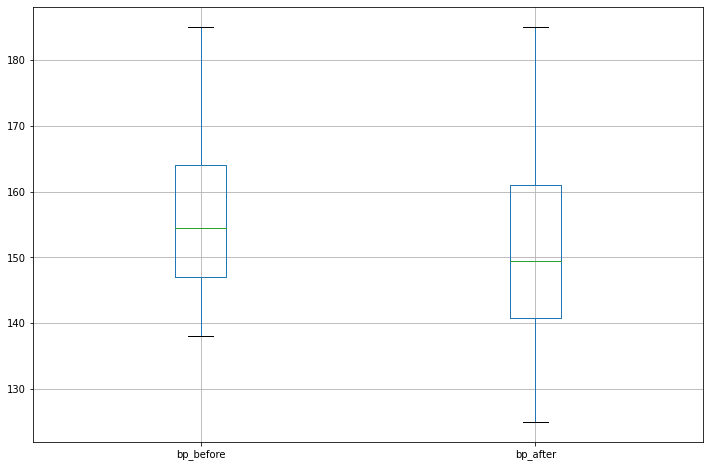

In [9]:
# get a visual of the data using a boxplot
bp_reading[['bp_before', 'bp_after']].boxplot(figsize=(12,8))
# we can see a visible difference between the before and after group, but is it significant?

In [11]:
stats.levene(bp_reading['bp_after'], bp_reading['bp_before']) # p-value is 2%, the variances are different, we will need a different test     

LeveneResult(statistic=4.863729003161597, pvalue=0.028383666362347747)

In [12]:
# calculate the residues between the two samples, store in new column bp_diff
bp_reading['bp_diff'] = scale(bp_reading['bp_after'] - bp_reading['bp_before'])

In [14]:
bp_reading[['bp_diff']].head()

,bp_diff
0,0.906743
1,0.726496
2,1.207155
3,-0.354987
4,0.005508


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc749df73d0>]],
      dtype=object)

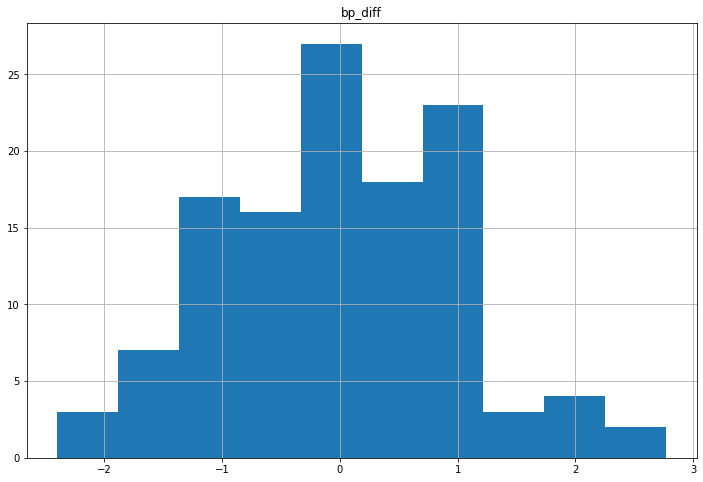

In [16]:
# view histogram of residues to see if they're normally distributed
bp_reading[['bp_diff']].hist(figsize=(12, 8))

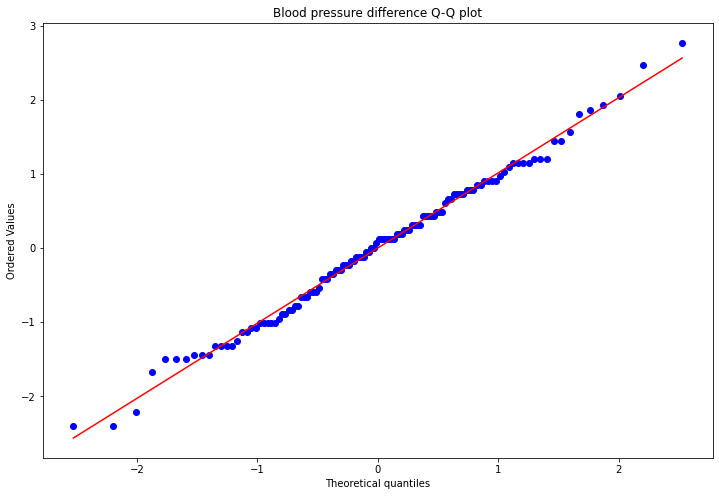

In [17]:
plt.figure(figsize=(12, 8))
stats.probplot(bp_reading['bp_diff'], plot=plt)

plt.title('Blood pressure difference Q-Q plot')
plt.show()

In [18]:
stats.shapiro(bp_reading['bp_diff']) # residues are normally distributed b/c results of shapiro test show p-value is 78%

ShapiroResult(statistic=0.9926842451095581, pvalue=0.7841846942901611)

In [19]:
stats.ttest_rel(bp_reading['bp_after'], bp_reading['bp_before']) # p-value is small, so the intervention was significant
# however we cannot completely rely on this t-test, b/c our Levene's test told us the variance between the two samples was not the same

Ttest_relResult(statistic=-3.3371870510833657, pvalue=0.0011297914644840823)

In [20]:
# Use the Wilcoxon signed-rank test to compares the medians between the two samples of data
rp.ttest(bp_reading['bp_after'], bp_reading['bp_before'], paired=True, equal_variances=False)
# this p-value indicates that the intervention did have a significant impact on the blood pressure results

(       sign  obs  sum ranks  expected
 0  positive   43     2406.5    3625.0
 1  negative   73     4843.5    3625.0
 2      zero    4       10.0      10.0
 3       all  120     7260.0    7260.0,
   Wilcoxon signed-rank test      results
 0      Mean for bp_after =    151.358333
 1     Mean for bp_before =    156.450000
 2                W value =   2406.500000
 3                Z value =     -3.192000
 4                p value =      0.001400
 5        Rank-Biserial r =     -0.335700
 6              Pearson r =     -0.291400)